In [1]:
import pickle
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from dltools.cov.markup import compute

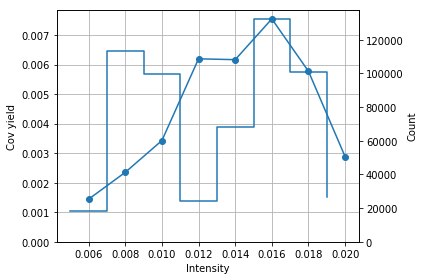

In [2]:
step = 0.002
edges = np.arange(0.005, 0.021, step)
filename = ("Data/Cov KER; "
            "target=C1p,I3p,I2p "
            "& gm2={:.3f}--{:.3f}.pickle").format

def count():
    for i, fr in enumerate(edges):
        to = fr + step
        fn = filename(fr, to)
        if not os.path.exists(fn):
            continue

        with open(fn, "rb") as fp:
            d = pickle.load(fp)

        key = "ker"
        yield {"fr": fr,
               "n": d["N"],
               "cov": d["Cov[X,Y,Z]"][key].sum().values}


df = pd.DataFrame(list(count()))

plt.figure()
plt.xlabel("Intensity")
plt.ylabel("Cov yield")
plt.plot(df["fr"] + step / 2, df["cov"], "-o")
plt.grid(True)
v, _ = plt.ylim()
plt.ylim(min(v, 0), None)

plt.twinx()
plt.ylabel("Count")
plt.step(df["fr"], df["n"], where="post")
plt.ylim(0, None)
plt.tight_layout()
plt.show()

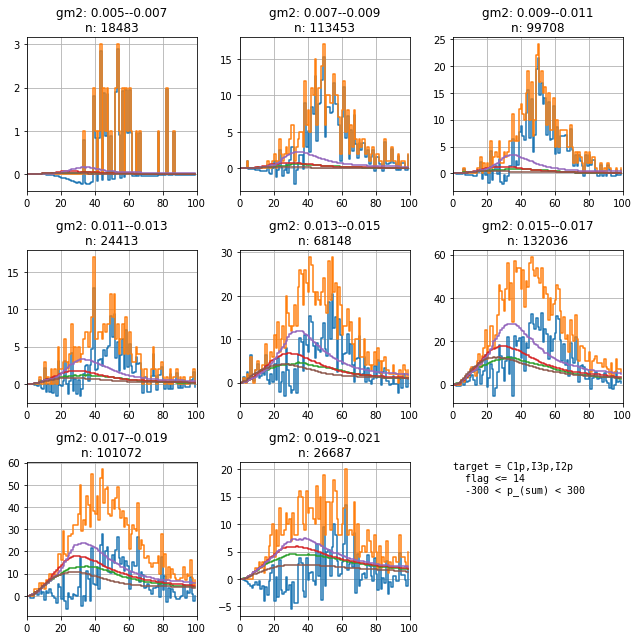

In [11]:
x, y = "edge_ker", "ker"

plt.figure(figsize=(9, 9))
for i, fr in enumerate(edges):
    to = fr + step
    fn = filename(fr, to)
    if not os.path.exists(fn):
        continue

    with open(fn, "rb") as fp:
        d = pickle.load(fp)
    n = d["N"]

    plt.subplot(3, 3, i + 1)
    plt.title(f"gm2: {fr:.3f}--{to:.3f}\nn: {n}")
    arr = compute(d["Cov[X,Y,Z]"])
    plt.step(
        arr[x], arr[y] * n,
        label="Cov[X,Y,Z] * N",
        where="post",
    )
    arr = compute(d["Sum[XYZ]"])
    plt.step(
        arr[x], arr[y],
        label="Sum[XYZ]",
        where="post",
    )
    arr = compute(d["Sum[XY]Sum[Z]"])
    plt.step(
        arr[x], arr[y] / n,
        label="Sum[XY]Sum[Z] / N",
        where="post",
    )
    arr = compute(d["Sum[XZ]Sum[Y]"])
    plt.step(
        arr[x], arr[y] / n,
        label="Sum[XZ]Sum[Y] / N",
        where="post",
    )
    arr = compute(d["Sum[YZ]Sum[X]"])
    plt.step(
        arr[x], arr[y] / n,
        label="Sum[YZ]Sum[X] / N",
        where="post",
    )
    arr = compute(d["Sum[X]Sum[Y]Sum[Z]"])
    plt.step(
        arr[x], arr[y] / n ** 2,
        label="Sum[X]Sum[Y]Sum[Z] / N ** 2",
        where="post",
    )
    plt.grid(True)
    plt.xlim(0, 100)
plt.subplot(339)
plt.text(0, 1, """\
target = C1p,I3p,I2p
  flag <= 14
  -300 < p_(sum) < 300\
""",
         fontdict={"family": "monospace"},
         verticalalignment="top")
plt.axis("off")
plt.tight_layout()
plt.show()

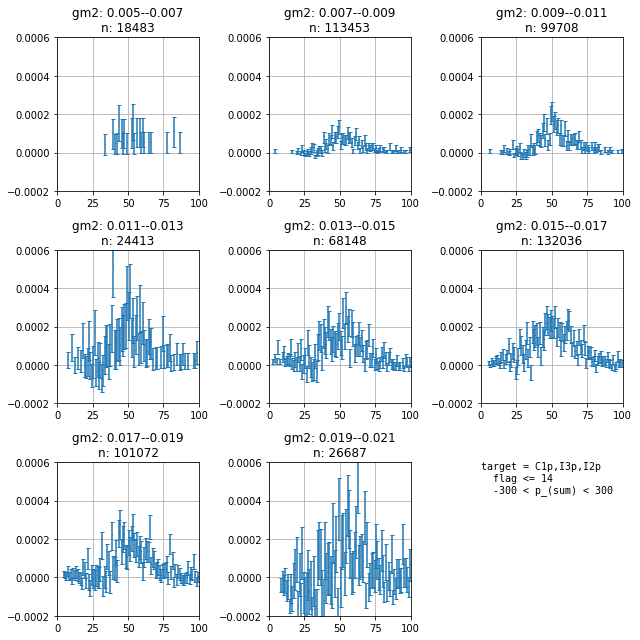

In [12]:
x, y = "edge_ker", "ker"

plt.figure(figsize=(9, 9))
for i, fr in enumerate(edges):
    to = fr + step
    fn = filename(fr, to)
    if not os.path.exists(fn):
        continue

    with open(fn, "rb") as fp:
        d = pickle.load(fp)
    n = d["N"]
    dx = d["Cov[X,Y,Z]"][x][1] - d["Cov[X,Y,Z]"][x][0]
    where = d["Sum[XYZ]"][y] != 0

    plt.subplot(3, 3, i + 1)
    plt.title(f"gm2: {fr:.3f}--{to:.3f}\nn: {n}")
    plt.errorbar(
        d["Cov[X,Y,Z]"][x][where] + dx / 2,
        d["Cov[X,Y,Z]"][y][where],
        d["Err[Cov[X,Y,Z]]"][y][where],
        fmt=",",
        capsize=2,
    )
    plt.grid(True)
    plt.xlim(0, 100)
    plt.ylim(-0.0002, 0.0006)
plt.subplot(339)
plt.text(0, 1, """\
target = C1p,I3p,I2p
  flag <= 14
  -300 < p_(sum) < 300\
""",
         fontdict={"family": "monospace"},
         verticalalignment="top")
plt.axis("off")
plt.tight_layout()
plt.show()